# Second Assignment
__Course:__ Undergraduate Machine Learning Course

__Design and Develop:__ Mobin Nesari 99222107

## Question 13:

### Imports and Reading Dataset

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as ss
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay, recall_score, precision_score
from itertools import product
plt.style.use("ggplot")
pd.set_option("max_columns", 200)
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv("fraud_oracle.csv")

### EDA

In [32]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [33]:
df.shape

(15420, 33)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [35]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [36]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [37]:
for c in df:
    if c != 'PolicyNumber':
        print(c)
        print(sorted(df[c].unique()), '\n')

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

In [38]:
df[df['DayOfWeekClaimed'] == '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,1517,15,400,2,more than 30,none,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [39]:
df[df['MonthClaimed'] == '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,1517,15,400,2,more than 30,none,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [40]:
print(df[df['Age'] == 0].shape)
df[df['Age'] == 0].sample(3)

(320, 33)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
5254,Jan,3,Saturday,Honda,Urban,Friday,Jan,4,Male,Single,0,Policy Holder,Sedan - Collision,Sedan,more than 69000,0,5255,15,400,2,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
6937,Nov,4,Saturday,Honda,Rural,Wednesday,Jan,4,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,6938,13,400,2,more than 30,more than 30,2 to 4,new,16 to 17,No,No,External,none,no change,1 vehicle,1995,All Perils
7007,Jan,2,Friday,Honda,Urban,Monday,Jan,2,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,7008,15,400,3,more than 30,more than 30,1,new,16 to 17,No,No,External,none,1 year,1 vehicle,1995,All Perils


In [41]:
df = df.drop(columns='PolicyNumber')

In [42]:
df = df[~(df['MonthClaimed'] == '0')]

In [43]:
df[df['Age']==0]['AgeOfPolicyHolder'].unique()

array(['16 to 17'], dtype=object)

In [44]:
df['Age'] = df['Age'].replace({0:16.5})

Check balance of classes and dataset

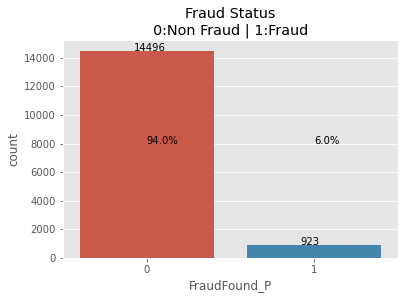

In [45]:
ax = sns.countplot(df['FraudFound_P'], 
                   order = df["FraudFound_P"].value_counts().index)

for p, label in zip(ax.patches, df["FraudFound_P"].value_counts().values):
    ax.annotate(label, (p.get_x()+0.320, p.get_height()))
    
ax.set_title('Fraud Status\n0:Non Fraud | 1:Fraud')
ax.text(0, 8000, f'{round(14496/len(df),2)*100}%')
ax.text(1, 8000, f'{round(923/len(df),2)*100}%')
plt.show()

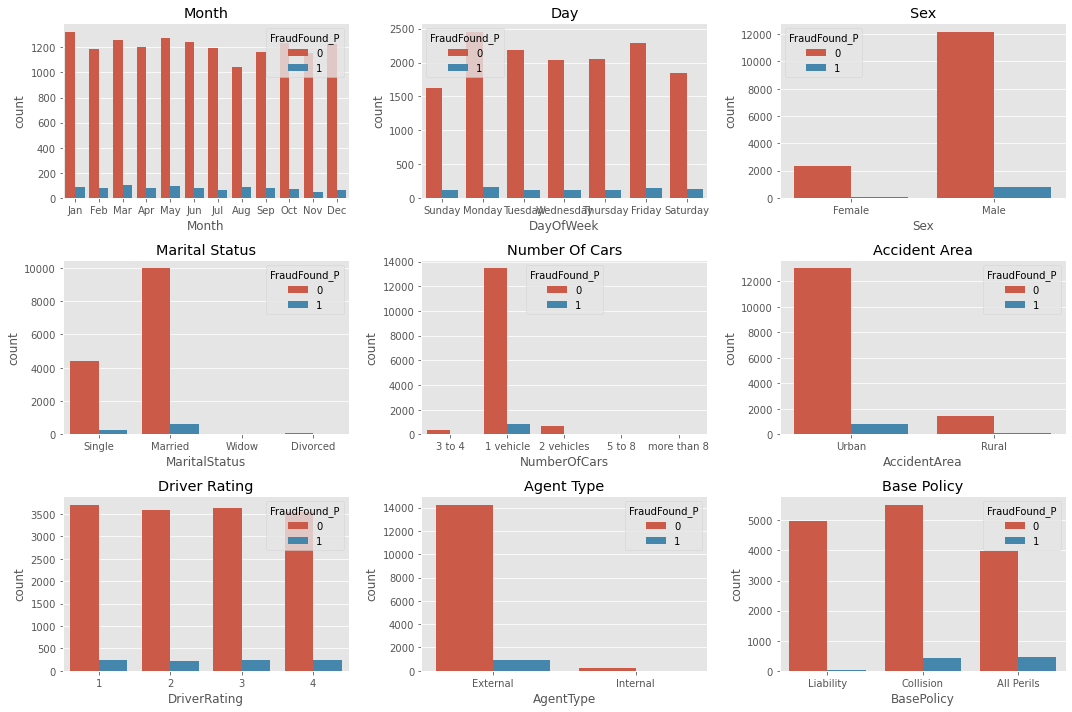

In [46]:
fig, ax = plt.subplots(3,3, figsize=(15,10))
sns.countplot(data=df, x='Month', hue='FraudFound_P', order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ax=ax[0][0])
ax[0][0].set_title('Month')

sns.countplot(data=df, x='DayOfWeek', hue='FraudFound_P', order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], ax=ax[0][1])
ax[0][1].set_title('Day')

sns.countplot(data=df, x='Sex', hue='FraudFound_P', ax=ax[0][2])
ax[0][2].set_title('Sex')

sns.countplot(data=df, x='MaritalStatus', hue='FraudFound_P', ax=ax[1][0])
ax[1][0].set_title('Marital Status')

sns.countplot(data=df, x='NumberOfCars', hue='FraudFound_P', ax=ax[1][1])
ax[1][1].set_title('Number Of Cars')

sns.countplot(data=df, x='AccidentArea', hue='FraudFound_P', ax=ax[1][2])
ax[1][2].set_title('Accident Area')

sns.countplot(data=df, x='DriverRating', hue='FraudFound_P', ax=ax[2][0])
ax[2][0].set_title('Driver Rating')

sns.countplot(data=df, x='AgentType', hue='FraudFound_P', ax=ax[2][1])
ax[2][1].set_title('Agent Type')

sns.countplot(data=df, x='BasePolicy', hue='FraudFound_P', ax=ax[2][2])
ax[2][2].set_title('Base Policy')


plt.tight_layout()

,PolicyType,FraudFound_P,Total Accidents,Percentage by PolicyType,Percentage by Total
0,Sedan - All Perils,411,4086,10.059,2.666
1,Sedan - Collision,384,5584,6.877,2.49
2,Sedan - Liability,36,4987,0.722,0.233
3,Sport - All Perils,0,22,0.0,0.0
4,Sport - Collision,48,348,13.793,0.311
5,Sport - Liability,0,1,0.0,0.0
6,Utility - All Perils,41,340,12.059,0.266
7,Utility - Collision,3,30,10.0,0.019
8,Utility - Liability,0,21,0.0,0.0
9,Column total,923,15419,53.51,5.985


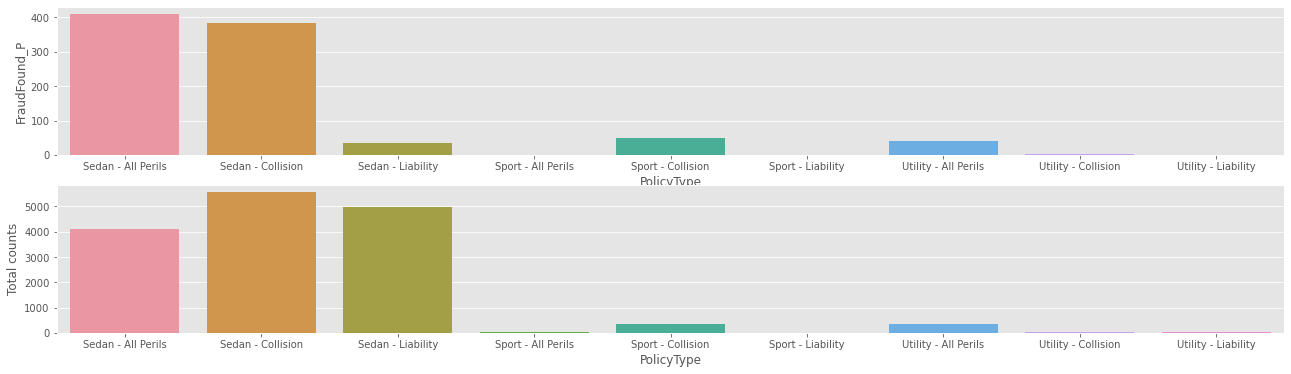

In [47]:
gpd_val1=df.groupby('PolicyType').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val2=df.groupby('PolicyType').agg('count').reset_index()

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(22, 6))
sns.barplot(x='PolicyType', y='FraudFound_P', data = gpd_val1, ax=ax1)
sns.barplot(x='PolicyType', y='FraudFound_P', data=gpd_val2, ax=ax2)

ax2.set(ylabel='Total counts')

None

total_list = pd.concat([gpd_val1, gpd_val2['FraudFound_P'].rename('Total Accidents')],axis=1)
total_list['Percentage by PolicyType']= round((total_list['FraudFound_P']/total_list['Total Accidents'])*100,3)
total_list['Percentage by Total'] = round((total_list['FraudFound_P']/sum(total_list['Total Accidents']))*100,3)

ax2.set(ylabel='Total counts')

data = [['Column total'],
        [sum(total_list['FraudFound_P'])], 
        [sum(total_list['Total Accidents'])], 
        [sum(total_list['Percentage by PolicyType'])], 
        [sum(total_list['Percentage by Total'])]]

nr = pd.DataFrame(data)

nr1 = nr.transpose()
nr1.rename(columns={0:'PolicyType',1:'FraudFound_P',2:'Total Accidents',3:'Percentage by PolicyType',4:'Percentage by Total'}, inplace=True)
pd.concat([total_list,nr1],ignore_index=True)

,VehicleCategory,FraudFound_P,Total Accidents,Percentage by VehicleCategory,Percentage by Total
0,Sedan,795,9670,8.221,5.156
1,Sport,84,5358,1.568,0.545
2,Utility,44,391,11.253,0.285
3,Column total,923,15419,21.042,5.986


,BasePolicy,FraudFound_P,Total Accidents,Percentage by BasePolicy,Percentage by Total
0,All Perils,452,4448,10.162,2.931
1,Collision,435,5962,7.296,2.821
2,Liability,36,5009,0.719,0.233
3,Column total,923,15419,18.177,5.985


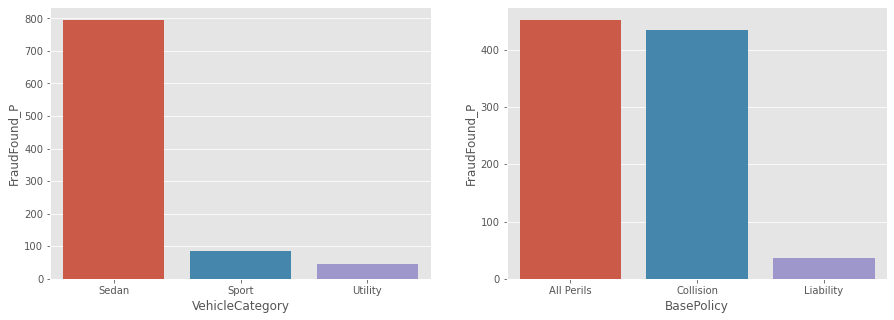

In [48]:
gpd_val1=df.groupby('VehicleCategory').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val6=df.groupby('VehicleCategory').agg('count').reset_index()
gpd_val3=df.groupby('BasePolicy').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val7=df.groupby('BasePolicy').agg('count').reset_index()

fig, (ax1, ax3) = plt.subplots(1,2,figsize=(15, 5))
sns.barplot(x='VehicleCategory', y='FraudFound_P', data = gpd_val1, ax=ax1)
sns.barplot(x='BasePolicy', y='FraudFound_P', data = gpd_val3, ax=ax3)


total_list1 = pd.concat([gpd_val1, gpd_val6['FraudFound_P'].rename('Total Accidents')],axis=1)
total_list1['Percentage by VehicleCategory']= round((total_list1['FraudFound_P']/total_list1['Total Accidents'])*100,3)
total_list1['Percentage by Total'] = round((total_list1['FraudFound_P']/sum(total_list1['Total Accidents']))*100,3)

total_list2 = pd.concat([gpd_val3, gpd_val7['FraudFound_P'].rename('Total Accidents')],axis=1)
total_list2['Percentage by BasePolicy']= round((total_list2['FraudFound_P']/total_list2['Total Accidents'])*100,3)
total_list2['Percentage by Total'] = round((total_list2['FraudFound_P']/sum(total_list2['Total Accidents']))*100,3)

data1 = [['Column total'],
        [sum(total_list1['FraudFound_P'])], 
        [sum(total_list1['Total Accidents'])], 
        [sum(total_list1['Percentage by VehicleCategory'])], 
        [sum(total_list1['Percentage by Total'])]]

data2 = [['Column total'],
        [sum(total_list2['FraudFound_P'])], 
        [sum(total_list2['Total Accidents'])], 
        [sum(total_list2['Percentage by BasePolicy'])], 
        [sum(total_list2['Percentage by Total'])]]

nr1 = pd.DataFrame(data1)
nr1 = nr1.transpose()
nr1.rename(columns={0:'VehicleCategory',1:'FraudFound_P',2:'Total Accidents',3:'Percentage by VehicleCategory',4:'Percentage by Total'}, inplace=True)
tl1=pd.concat([total_list1,nr1],ignore_index=True)

nr2 = pd.DataFrame(data2)
nr2 = nr2.transpose()
nr2.rename(columns={0:'BasePolicy',1:'FraudFound_P',2:'Total Accidents',3:'Percentage by BasePolicy',4:'Percentage by Total'}, inplace=True)
tl2=pd.concat([total_list2,nr2],ignore_index=True)

display(tl1)
display(tl2)


,Make,FraudFound_P,Total Accidents,Percentage by Make,Percentage by Total
0,Accura,59,472,12.5,0.383
1,BMW,1,15,6.667,0.006
2,Chevrolet,94,1681,5.592,0.61
3,Dodge,2,109,1.835,0.013
4,Ferrari,0,2,0.0,0.0
5,Ford,33,450,7.333,0.214
6,Honda,179,2800,6.393,1.161
7,Jaguar,0,6,0.0,0.0
8,Lexus,0,1,0.0,0.0
9,Mazda,123,2354,5.225,0.798


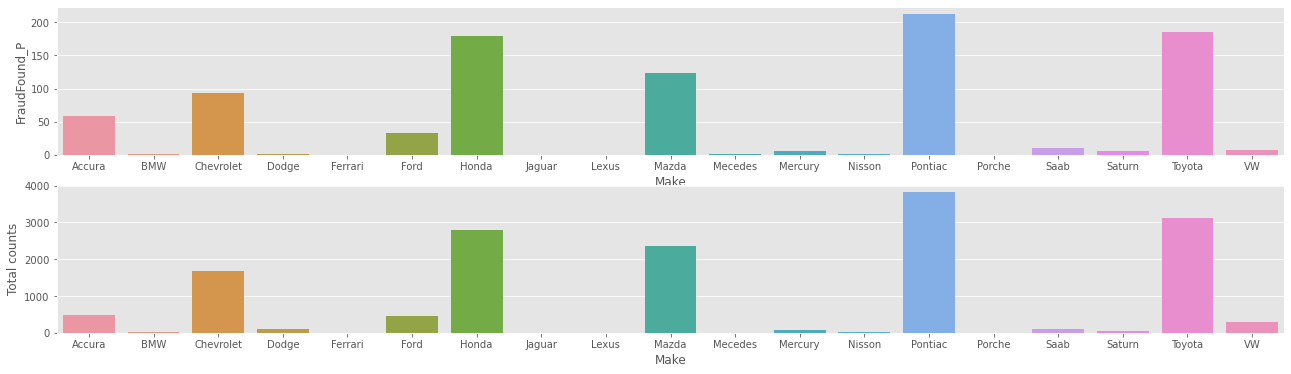

In [49]:
gpd_val1=df.groupby('Make').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val2=df.groupby('Make').agg('count').reset_index()

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(22, 6))
sns.barplot(x='Make', y='FraudFound_P', data = gpd_val1,ax=ax1)
sns.barplot(x='Make', y='FraudFound_P', data = gpd_val2,ax=ax2)

total_list = pd.concat([gpd_val1, gpd_val2['FraudFound_P'].rename('Total Accidents')],axis=1)
total_list['Percentage by Make']= round((total_list['FraudFound_P']/total_list['Total Accidents'])*100,3)
total_list['Percentage by Total'] = round((total_list['FraudFound_P']/sum(total_list['Total Accidents']))*100,3)

ax2.set(ylabel='Total counts')

data = [['Column total'],
        [sum(total_list['FraudFound_P'])], 
        [sum(total_list['Total Accidents'])], 
        [sum(total_list['Percentage by Make'])], 
        [sum(total_list['Percentage by Total'])]]

nr = pd.DataFrame(data)

nr1 = nr.transpose()
nr1.rename(columns={0:'Make',1:'FraudFound_P',2:'Total Accidents',3:'Percentage by Make',4:'Percentage by Total'}, inplace=True)
pd.concat([total_list,nr1],ignore_index=True)

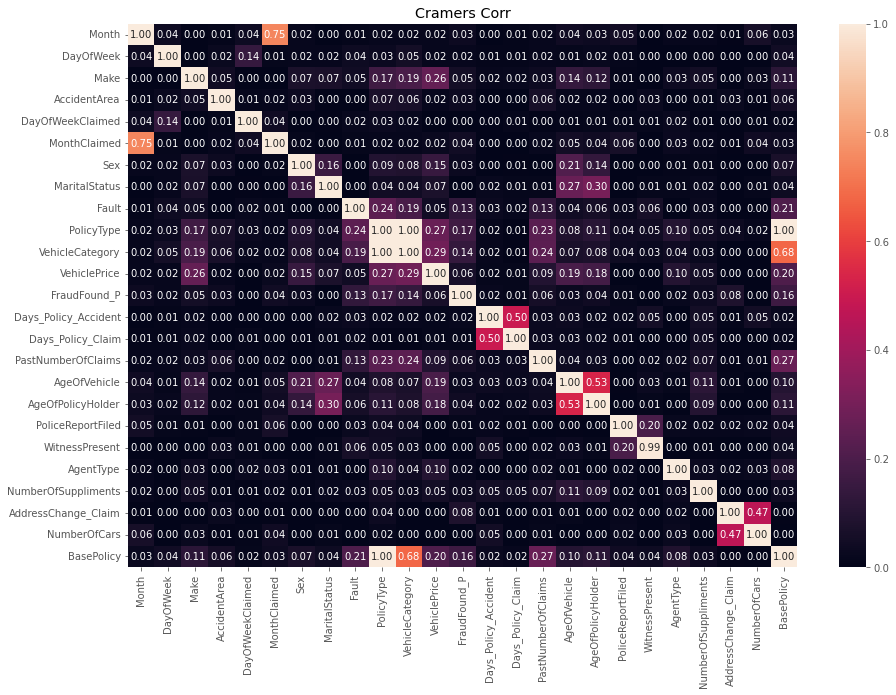

In [50]:
ob=[]
for data in df.columns:
    if data == 'FraudFound_P':
        ob.append(data)
    if df[data].dtype=='object':
        ob.append(data)
        
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramers_df = pd.DataFrame(index=ob)

for x in ob:
    a = []
    for y in ob:
        a.append(cramers_v(df[y], df[x]))
    cramers_df[x] = a


plt.figure(figsize=(15,10))
sns.heatmap(cramers_df, annot=True, fmt='.2f')
plt.title('Cramers Corr')
plt.show()

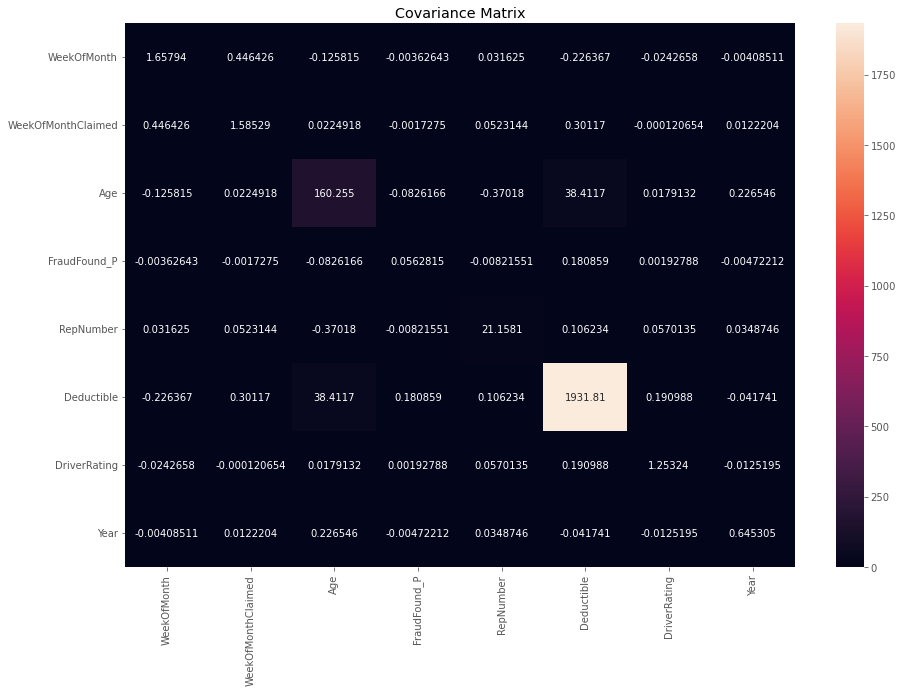

In [55]:
cov_matrix = pd.DataFrame.cov(df)
plt.figure(figsize=(15,10))
plt.title('Covariance Matrix')
sns.heatmap(cov_matrix, fmt='g', annot=True)
plt.show()

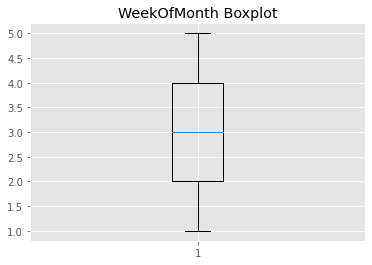

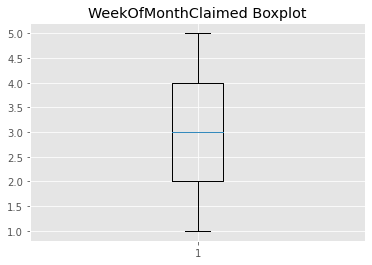

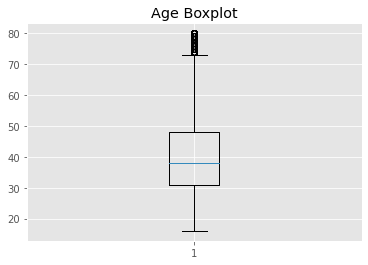

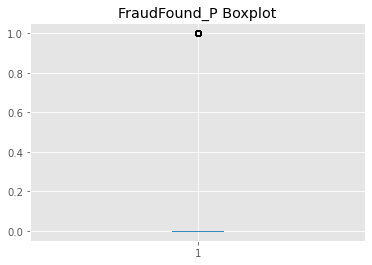

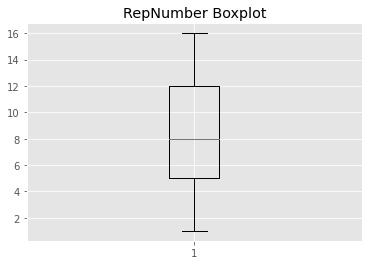

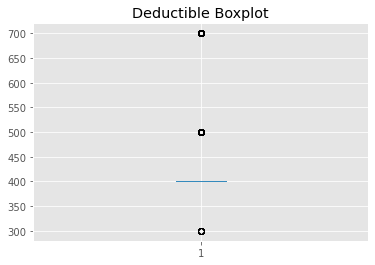

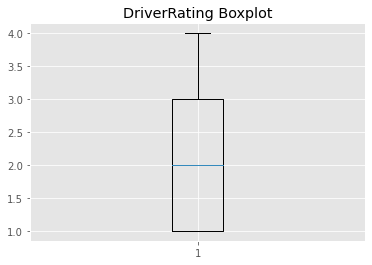

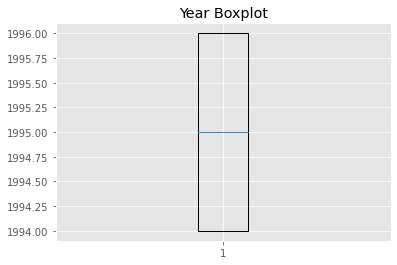

In [22]:
columns = ["WeekOfMonth", "WeekOfMonthClaimed", "Age", "FraudFound_P", "RepNumber", "Deductible", "DriverRating", "Year"]
for c in columns:
    plt.boxplot(df[c])
    plt.title(f"{c} Boxplot")
    plt.show()

In [54]:
def remove_outliers(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    
    IQR = Q3 - Q1
    outliers = ((dataframe['values'] < Q1 - 1.5 * IQR) | (dataframe['values'] > Q3 + 1.5 * IQR))
    
    return dataframe[~outliers]



In [23]:
df = df.drop(columns='PolicyType')

In [24]:
col_ordering = [
    {'col':'AccidentArea','mapping':{'Urban':1, 'Rural':0}},
    {'col':'Sex','mapping':{'Female':1, 'Male':0}},
    {'col':'Fault','mapping':{'Policy Holder':1, 'Third Party':0}},
    {'col':'PoliceReportFiled','mapping':{'Yes':1, 'No':0}},
    {'col':'WitnessPresent','mapping':{'Yes':1, 'No':0}},
    {'col':'AgentType','mapping':{'External':1, 'Internal':0}},
    {'col':'Month','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'DayOfWeek','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'DayOfWeekClaimed','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'MonthClaimed','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':2,'more than 4':3 }},
    {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':2,'more than 5':3}}, 
    {'col':'VehiclePrice','mapping':{'less than 20000':0,'20000 to 29000':1,'30000 to 39000':2,
                                     '40000 to 59000':3,'60000 to 69000':4,'more than 69000':5}},
    {'col':'AgeOfVehicle','mapping':{'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2}},
    {'col':'Days_Policy_Accident','mapping':{'more than 30':4,'15 to 30':3,'none':0,'1 to 7':1,'8 to 15':2}},
    {'col':'Days_Policy_Claim','mapping':{'more than 30':4,'15 to 30':3,'none':0,'1 to 7':1,'8 to 15':2}},
    {'col':'AgeOfPolicyHolder','mapping':{'16 to 17':1,'18 to 20':2,'21 to 25':3,'26 to 30':4,'31 to 35':5,'36 to 40':6,
                                          '41 to 50':7,'51 to 65':8,'over 65':9}},
    {'col':'AddressChange_Claim','mapping':{'no change':0,'under 6 months':1,'1 year':2,'2 to 3 years':3,'4 to 8 years':4}},
    {'col':'NumberOfCars','mapping':{'1 vehicle':1,'2 vehicles':2,'3 to 4':3,'5 to 8':4,'more than 8':5}}
]
ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)

In [25]:
df2 = ord_encoder.fit_transform(df)

In [26]:
OHE = OneHotEncoder(cols = ['Make','MaritalStatus','VehicleCategory','BasePolicy'],use_cat_names=True, return_df=True) 
df3 = OHE.fit_transform(df2)

In [27]:
df3.head()

,Month,WeekOfMonth,DayOfWeek,Make_Honda,Make_Toyota,Make_Ford,Make_Mazda,Make_Chevrolet,Make_Pontiac,Make_Accura,Make_Dodge,Make_Mercury,Make_Jaguar,Make_Nisson,Make_VW,Make_Saab,Make_Saturn,Make_Porche,Make_BMW,Make_Mecedes,Make_Ferrari,Make_Lexus,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus_Single,MaritalStatus_Married,MaritalStatus_Widow,MaritalStatus_Divorced,Age,Fault,VehicleCategory_Sport,VehicleCategory_Utility,VehicleCategory_Sedan,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy_Liability,BasePolicy_Collision,BasePolicy_All Perils
0,12,5,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,1,0,0,0,21.0,1,1,0,0,5,0,12,300,1,4,4,0,3,4,0,0,1,0,2,3,1994,1,0,0
1,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,4,0,1,0,0,0,34.0,1,1,0,0,5,0,15,400,4,4,4,0,6,5,1,0,1,0,0,1,1994,0,1,0
2,10,5,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,11,2,0,0,1,0,0,47.0,1,1,0,0,5,0,7,400,3,4,4,1,7,7,0,0,1,0,0,1,1994,0,1,0
3,6,2,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,7,1,0,0,1,0,0,65.0,0,1,0,0,1,0,4,400,2,4,4,1,8,8,1,0,1,3,0,1,1994,1,0,0
4,1,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,1,1,0,0,0,27.0,0,1,0,0,5,0,3,400,1,4,4,0,5,5,0,0,1,0,0,1,1994,0,1,0


In [28]:
cat_var_prod = list(product(df3.columns,df3.columns, repeat = 1))

result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                                df3[i[0]], df3[i[1]])))[1]))
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])

In [50]:
chi_test_output2 = chi_test_output[chi_test_output['var1']=='FraudFound_P'].sort_values('coeff').reset_index(drop=True)
def rej_acc(x):
    if x > 0.05:
        Ho = 'A_H0'
    else:
        Ho = 'R_H0'
    return Ho

chi_test_output2['result'] = chi_test_output2['coeff'].apply(rej_acc)
chi_test_output2

,var1,var2,coeff,result
0,FraudFound_P,BasePolicy_Liability,3.116620e-81,R_H0
1,FraudFound_P,VehicleCategory_Sport,1.208553e-63,R_H0
2,FraudFound_P,Fault,1.406180e-59,R_H0
3,FraudFound_P,VehicleCategory_Sedan,9.021607e-52,R_H0
4,FraudFound_P,BasePolicy_All Perils,8.400805e-44,R_H0
5,FraudFound_P,AddressChange_Claim,9.704718e-22,R_H0
6,FraudFound_P,Deductible,1.302831e-15,R_H0
7,FraudFound_P,VehiclePrice,2.888324e-13,R_H0
8,FraudFound_P,PastNumberOfClaims,1.405198e-11,R_H0
9,FraudFound_P,Make_Accura,2.516880e-09,R_H0


### Split Data for Models

In [55]:
X = df3.drop(columns='FraudFound_P')
y = df3['FraudFound_P']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27, stratify=y)
y_train.value_counts()

0    11597
1      738
Name: FraudFound_P, dtype: int64

In [165]:
modelname, acc, recall, precision, f1, roc_auc = [],[],[],[],[],[]
model = {'xgboost':XGBClassifier(use_label_encoder=False, objective= 'binary:logistic',eval_metric='aucpr'), 
         'dt': DecisionTreeClassifier(),
         'rf':RandomForestClassifier(),
         'blf':BalancedRandomForestClassifier(),
         'adaboost':AdaBoostClassifier(), 
         'gradientb':GradientBoostingClassifier(),
         'mlp':MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32, 16, 8), max_iter=300,activation = 'relu',solver='adam',random_state=1),
         'svc': SVC(gamma='auto'),
         'KNN': KNeighborsClassifier(n_neighbors=10, weights='distance'),
         'LR': LogisticRegression(random_state=27)
        }

def fit_model(x_train, x_test, y_train, y_test, sampling):
    for key,value in zip(model, model.values()):
        print(f"Model {key} {sampling}")
        ml_model = value
        ml_model.fit(x_train, y_train)
        y_pred = ml_model.predict(x_test)
        
        modelname.append(f'{key} {sampling}')
        acc.append(accuracy_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        roc_auc.append(roc_auc_score(y_test, y_pred))

def sampling(x_train, y_train, kind='over', ss=0.5):
    if kind == 'over':
        oversample = SMOTE(sampling_strategy=ss)
        X, y = oversample.fit_resample(x_train, y_train)
    elif kind == 'under':
        join_train = pd.concat([x_train, y_train], axis=1)
        claim = join_train[join_train['FraudFound_P']==1]
        no_claim = join_train[join_train['FraudFound_P']==0]

        undersample_noclaim = no_claim.sample(len(claim)*3)
        join_train2 = pd.concat([claim,undersample_noclaim]).sample(frac=1)

        X = join_train2.drop(columns='FraudFound_P')
        y = join_train2['FraudFound_P']
    return X, y

def metric_result(y_test, y_pred):
    print("F1 Score : ",f1_score(y_test, y_pred, average='binary'))
    print("Recall Score : ",recall_score(y_test, y_pred))
    print("Precision Score : ",precision_score(y_test, y_pred))

    ig, ax = plt.subplots(1,2, figsize=(10,5))
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax[0])
    ax[0].set_title('Confusion Matrix')

    # ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    ax[1].plot(fpr,tpr, label="AUC="+str(auc))
    ax[1].set_title('ROC AUC')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].legend(loc=4)
    plt.show()

def glm_result(res, X_test, y_test):
    X_test_sm = sm.add_constant(X_test)
    y_pred = res.predict(X_test_sm)

    df_res = pd.DataFrame({'is_claim_real':y_test, 'is_claim_prob':y_pred})
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df_res[i]= df_res.is_claim_prob.map(lambda x: 1 if x > i else 0)
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

    cut_off = [0.0,0.05, 0.1, 0.15 , 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
    f1_result = []
    for i in cut_off:
        df_res['final_predicted'] = df_res['is_claim_prob'].map( lambda x: 1 if x > i else 0)
        f1_result.append(roc_auc_score(df_res['is_claim_real'], df_res['final_predicted']))
    df_res2 = pd.DataFrame({'cut_off':cut_off, 'f1_score':f1_result})
    best_tresh = df_res2.sort_values('f1_score', ascending=False).head(1)['cut_off'].values[0]
    y_pred_thresh = (y_pred >= best_tresh).astype('float')
    print('Best Threshold :', best_tresh)
    metric_result(y_test, y_pred_thresh)

def find_best_tresh(pred_proba, y_test):
    df_res = pd.DataFrame({'prob':pred_proba})
    cut_off = [0.0,0.05, 0.1, 0.15 , 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
    f1_result = []
    for i in cut_off:
        df_res['final_predicted'] = df_res['prob'].map( lambda x: 1 if x > i else 0)
        f1_result.append(roc_auc_score(y_test, df_res['final_predicted']))
    df_res2 = pd.DataFrame({'cut_off':cut_off, 'f1_score':f1_result})
    best_tresh = df_res2.sort_values('f1_score', ascending=False).head(1)['cut_off'].values[0]
    y_pred_thresh = (y_pred >= best_tresh).astype('float')
    print('Best Threshold :', best_tresh)
    metric_result(y_test, y_pred_thresh)

### Oversampling

In [166]:
oversample = SMOTE(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(X_train, y_train)
print('After Oversampling:\n',y_over.value_counts())

After Oversampling:
 0    11597
1     5798
Name: FraudFound_P, dtype: int64


In [167]:
fit_model(X_over, X_test, y_over, y_test, 'over')

Model xgboost over
Model dt over
Model rf over
Model blf over
Model adaboost over
Model gradientb over
Model mlp over
Model svc over
Model KNN over
Model LR over


### Undersampling

In [168]:
join_train = pd.concat([X_train, y_train], axis=1)
claim = join_train[join_train['FraudFound_P']==1]
no_claim = join_train[join_train['FraudFound_P']==0]

undersample_noclaim = no_claim.sample(len(claim)*2)
join_train2 = pd.concat([claim,undersample_noclaim]).sample(frac=1)

print("Before Undersample:\n", join_train['FraudFound_P'].value_counts())
print("After Undersample:\n", join_train2['FraudFound_P'].value_counts())

X_under = join_train2.drop(columns='FraudFound_P')
y_under = join_train2['FraudFound_P']

Before Undersample:
 0    11597
1      738
Name: FraudFound_P, dtype: int64
After Undersample:
 0    1476
1     738
Name: FraudFound_P, dtype: int64


In [169]:
fit_model(X_under, X_test, y_under, y_test, 'Under')

Model xgboost Under
Model dt Under
Model rf Under
Model blf Under
Model adaboost Under
Model gradientb Under
Model mlp Under
Model svc Under
Model KNN Under
Model LR Under


### Normal Sampling

In [170]:
fit_model(X_train, X_test, y_train, y_test, 'Normal')

Model xgboost Normal
Model dt Normal
Model rf Normal
Model blf Normal
Model adaboost Normal
Model gradientb Normal
Model mlp Normal
Model svc Normal
Model KNN Normal
Model LR Normal


In [171]:
df_model = pd.DataFrame({'model':modelname, 'accuracy':acc, 'recall':recall, 'precision':precision, 'f1':f1, 'roc_auc':roc_auc})

In [172]:
df_model

,model,accuracy,recall,precision,f1,roc_auc
0,xgboost over,0.931907,0.086486,0.280702,0.132231,0.536172
1,dt over,0.889754,0.254054,0.188755,0.216590,0.592187
2,rf over,0.938067,0.059459,0.392857,0.103286,0.526798
3,blf over,0.920558,0.145946,0.236842,0.180602,0.557968
4,adaboost over,0.917964,0.091892,0.166667,0.118467,0.531286
5,gradientb over,0.927691,0.081081,0.220588,0.118577,0.531399
6,mlp over,0.940013,0.000000,0.000000,0.000000,0.500000
7,svc over,0.926719,0.086486,0.219178,0.124031,0.533412
8,KNN over,0.739300,0.270270,0.069541,0.110619,0.519751
9,LR over,0.837873,0.270270,0.120482,0.166667,0.572182


### Hypertuning Model 1

In [92]:
X_over, y_over = sampling(X_train, y_train, 'over', 0.5)
X_under, y_under = sampling(X_train, y_train, 'under', 0.5)

1- XGBoost

In [93]:
params = {
            'n_estimators':[300], #300
          'max_depth':[7], #7
          'learning_rate':[0.1] #0.1
         }
skf = RepeatedStratifiedKFold(n_splits=3)
xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic',eval_metric='auc')

grid_search = GridSearchCV(estimator=xgb, param_grid=params, scoring='f1', cv=skf)
grid_search.fit(X_under, y_under)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     imp...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [7],
                         'n_estimators': [300]},
             scoring='f1')

In [94]:
grid_search.best_score_

0.4923489641555635

<AxesSubplot:>

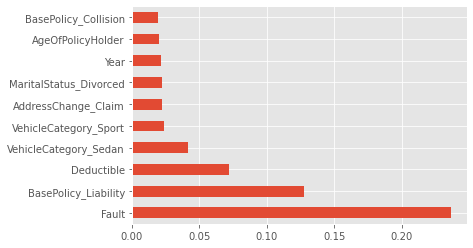

In [95]:
feat_importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False).head(10).plot(kind='barh')

F1 Score :  0.32945091514143093
Recall Score :  0.5351351351351351
Precision Score :  0.23798076923076922


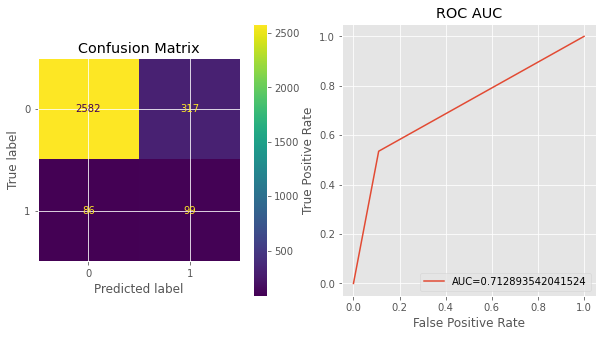

In [96]:
y_pred = grid_search.predict(X_test)
metric_result(y_test, y_pred)

2- Decision Tree Classifier

In [97]:
params = {
          'criterion':['gini', 'entropy', 'log_loss'],#300
          'splitter':['best','random'],
          'min_samples_split':[2,3,4,5],
          'max_features':['','auto', 'sqrt', 'log2']
         }
skf = RepeatedStratifiedKFold(n_splits=3)
dt = DecisionTreeClassifier(class_weight='balanced')

grid_search_dt = GridSearchCV(estimator=dt, param_grid=params, scoring='f1', cv=skf)
grid_search_dt.fit(X_under, y_under)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['', 'auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [98]:
grid_search_dt.best_params_

{'criterion': 'log_loss',
 'max_features': 'auto',
 'min_samples_split': 4,
 'splitter': 'random'}

In [99]:
grid_search_dt.best_score_

0.4632860575682349

<AxesSubplot:>

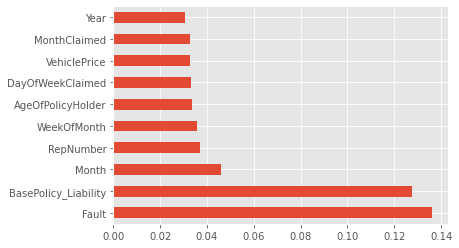

In [100]:
feat_importances = pd.Series(grid_search_dt.best_estimator_.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False).head(10).plot(kind='barh')

F1 Score :  0.18373205741626794
Recall Score :  0.518918918918919
Precision Score :  0.11162790697674418


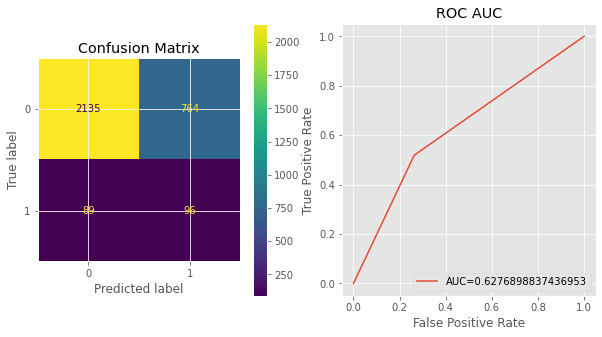

In [101]:
y_pred = grid_search_dt.predict(X_test)
metric_result(y_test, y_pred)

3- Random Forest

In [102]:
params = {
          'n_estimators':[200],
          'criterion':['gini'],
          'min_samples_split':[3],
          'min_samples_leaf':[3],
         }
skf = RepeatedStratifiedKFold(n_splits=3)
rf = RandomForestClassifier(class_weight='balanced')

grid_search_rf = GridSearchCV(estimator=rf, param_grid=params, scoring='f1', cv=skf)
grid_search_rf.fit(X_under, y_under)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini'], 'min_samples_leaf': [3],
                         'min_samples_split': [3], 'n_estimators': [200]},
             scoring='f1')

In [103]:
grid_search_rf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 200}

In [104]:
grid_search_rf.best_score_

0.5348931979956152

<AxesSubplot:>

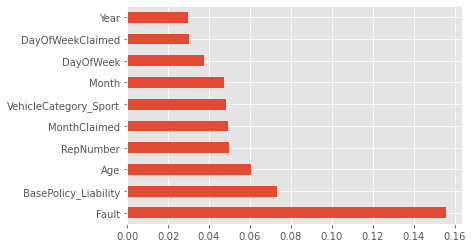

In [105]:
feat_importances = pd.Series(grid_search_rf.best_estimator_.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False).head(10).plot(kind='barh')

F1 Score :  0.297719087635054
Recall Score :  0.6702702702702703
Precision Score :  0.19135802469135801


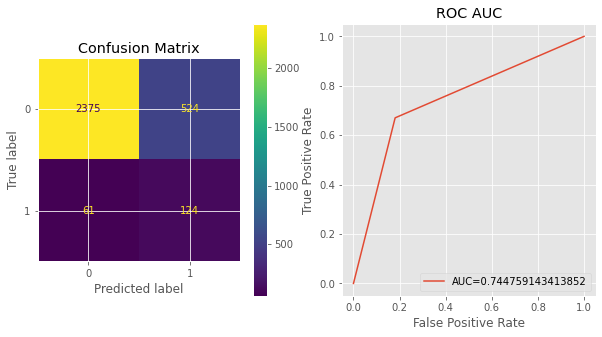

In [106]:
y_pred = grid_search_rf.predict(X_test)
metric_result(y_test, y_pred)

4- Balanced Random Forest

In [107]:
params = {
          'n_estimators':[300],
          'criterion':['gini'],
          'min_samples_split':[3],
          'min_samples_leaf':[3],
          'max_features':['log2']
         }
skf = RepeatedStratifiedKFold(n_splits=3)
brf = BalancedRandomForestClassifier(class_weight='balanced')

grid_search_brf = GridSearchCV(estimator=rf, param_grid=params, scoring='f1', cv=skf)
grid_search_brf.fit(X_under, y_under)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini'], 'max_features': ['log2'],
                         'min_samples_leaf': [3], 'min_samples_split': [3],
                         'n_estimators': [300]},
             scoring='f1')

In [108]:
grid_search_brf.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 300}

In [109]:
grid_search_brf.best_score_

0.5411467047370399

<AxesSubplot:>

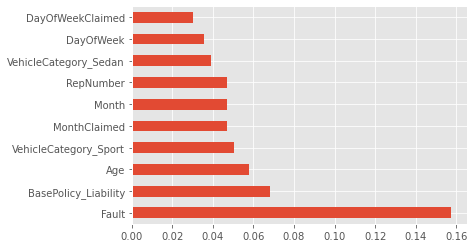

In [110]:
feat_importances = pd.Series(grid_search_brf.best_estimator_.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False).head(10).plot(kind='barh')

F1 Score :  0.27850877192982454
Recall Score :  0.6864864864864865
Precision Score :  0.1746905089408528


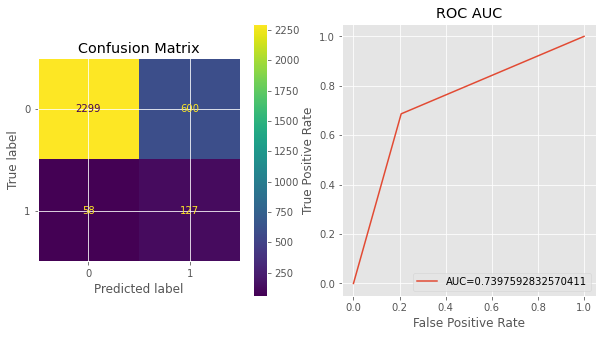

In [111]:
y_pred = grid_search_brf.predict(X_test)
metric_result(y_test, y_pred)

### Hypertuning Model with Feature Selection

In [113]:
X_train2 = X_train.drop(columns=['Days_Policy_Claim','DayOfWeek','WitnessPresent','WeekOfMonthClaimed','DayOfWeekClaimed','DriverRating','WeekOfMonth','NumberOfCars','RepNumber'])
X_test2 = X_test.drop(columns=['Days_Policy_Claim','DayOfWeek','WitnessPresent','WeekOfMonthClaimed','DayOfWeekClaimed','DriverRating','WeekOfMonth','NumberOfCars','RepNumber'])

In [114]:
X_under2, y_under2 = sampling(X_train2, y_train, 'under')

1- XGBoost

In [115]:
params = {
            'n_estimators':[300], #300
          'max_depth':[8], #8
          'learning_rate':[0.1] #0.1
         }
skf = RepeatedStratifiedKFold(n_splits=3)
xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic',eval_metric='auc')

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=params, scoring='f1', cv=skf)
grid_search_xgb.fit(X_under2, y_under2)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     imp...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [8],
                         'n_estimators': [300]},
             scoring='f1')

In [116]:
grid_search_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300}

<AxesSubplot:>

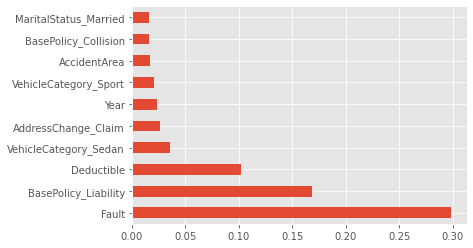

In [117]:
feat_importances = pd.Series(grid_search_xgb.best_estimator_.feature_importances_, index=X_train2.columns)
feat_importances.sort_values(ascending=False).head(10).plot(kind='barh')

F1 Score :  0.2955665024630542
Recall Score :  0.4864864864864865
Precision Score :  0.21226415094339623


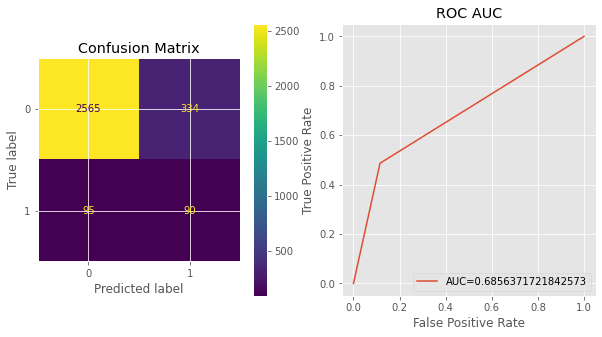

In [118]:
y_pred = grid_search_xgb.predict(X_test2)
metric_result(y_test, y_pred)

2- Decision Tree

In [119]:
params = {
          'criterion':['entropy'],#entropy
          'splitter':['best'],
          'min_samples_split':[4], #4
          'max_features':['auto'] #auto
         }
skf = RepeatedStratifiedKFold(n_splits=3)
dt = DecisionTreeClassifier(class_weight='balanced')

grid_search_dt = GridSearchCV(estimator=dt, param_grid=params, scoring='f1', cv=skf)
grid_search_dt.fit(X_under2, y_under2)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['entropy'], 'max_features': ['auto'],
                         'min_samples_split': [4], 'splitter': ['best']},
             scoring='f1')

In [120]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_split': 4,
 'splitter': 'best'}

In [121]:
grid_search_dt.best_score_

0.46880444745888133

<AxesSubplot:>

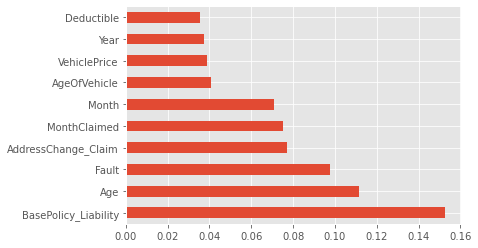

In [122]:
feat_importances = pd.Series(grid_search_dt.best_estimator_.feature_importances_, index=X_train2.columns)
feat_importances.sort_values(ascending=False).head(10).plot(kind='barh')

F1 Score :  0.2346938775510204
Recall Score :  0.6216216216216216
Precision Score :  0.14465408805031446


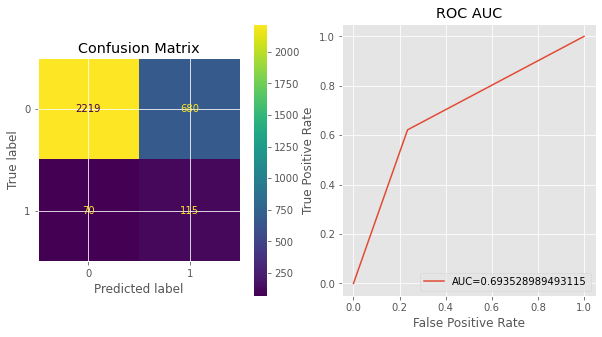

In [123]:
y_pred = grid_search_dt.predict(X_test2)
metric_result(y_test, y_pred)

3- Random Forest

In [124]:
params = {
          'n_estimators':[300], #300
          'criterion':['entropy'], #entropy
          'min_samples_split':[2], # 2
          'min_samples_leaf':[4], #4
         }
skf = RepeatedStratifiedKFold(n_splits=3)
rf = RandomForestClassifier(class_weight='balanced')

grid_search_rf = GridSearchCV(estimator=rf, param_grid=params, scoring='f1', cv=skf)
grid_search_rf.fit(X_under2, y_under2)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['entropy'], 'min_samples_leaf': [4],
                         'min_samples_split': [2], 'n_estimators': [300]},
             scoring='f1')

In [125]:
grid_search_rf.best_score_

0.6033990464557892

In [126]:
grid_search_rf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

<AxesSubplot:>

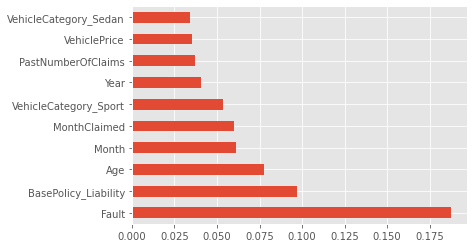

In [127]:
feat_importances = pd.Series(grid_search_rf.best_estimator_.feature_importances_, index=X_train2.columns)
feat_importances.sort_values(ascending=False).head(10).plot(kind='barh')


F1 Score :  0.27182718271827183
Recall Score :  0.8162162162162162
Precision Score :  0.1630669546436285


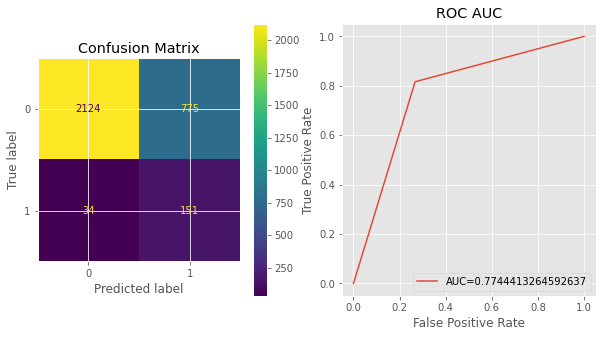

In [128]:
y_pred = grid_search_rf.predict(X_test2)
metric_result(y_test, y_pred)

4- Balanced Random Forest

In [129]:
params = {
          'n_estimators':[300], #300
          'criterion':['gini', 'entropy'], #entropy
          'min_samples_split':[2], #2
          'min_samples_leaf':[3], #3
          'max_features':['log2'] #log2
         }
skf = RepeatedStratifiedKFold(n_splits=3)
brf = BalancedRandomForestClassifier(class_weight='balanced')

grid_search_brf = GridSearchCV(estimator=rf, param_grid=params, scoring='f1', cv=skf)
grid_search_brf.fit(X_under2, y_under2)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['log2'], 'min_samples_leaf': [3],
                         'min_samples_split': [2], 'n_estimators': [300]},
             scoring='f1')

In [130]:
grid_search_brf.best_params_

{'criterion': 'entropy',
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [131]:
grid_search_brf.best_score_

0.5948097506739184

<AxesSubplot:>

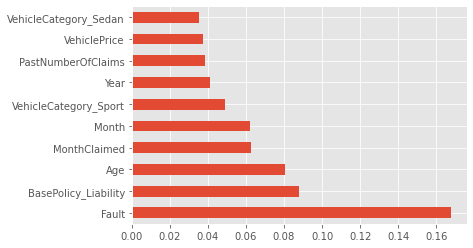

In [132]:
feat_importances = pd.Series(grid_search_brf.best_estimator_.feature_importances_, index=X_train2.columns)
feat_importances.sort_values(ascending=False).head(10).plot(kind='barh')

F1 Score :  0.28326996197718624
Recall Score :  0.8054054054054054
Precision Score :  0.17185697808535177


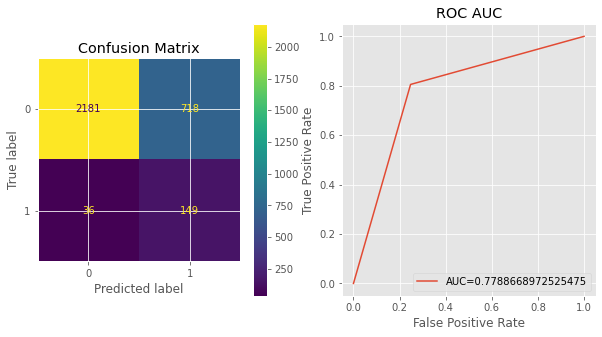

In [133]:
y_pred = grid_search_brf.predict(X_test2)
metric_result(y_test, y_pred)

5- SVC

In [151]:
svc = SVC(gamma='auto')
svc.fit(X_under2, y_under2)
y_pred2 = svc.predict(X_test2)
print(f'f1 score: {f1_score(y_test, y_pred2)}')
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred)}')

f1 score: 0.07142857142857142
accuracy: 0.7522697795071336
recall: 0.6
precision: 0.13857677902621723
ROC-AUC: 0.6809934460158676


6- KNN

In [173]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_under2, y_under2)
y_pred2 = knn.predict(X_test2)
print(f'f1 score: {f1_score(y_test, y_pred2)}')
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred)}')

f1 score: 0.11643835616438357
accuracy: 0.7522697795071336
recall: 0.6
precision: 0.13857677902621723
ROC-AUC: 0.6809934460158676


### Tuning Target Weights and Thresholds

1- XGBoost

In [134]:
params = {
            'n_estimators':[300], #100
          'max_depth':[8], #6
          'learning_rate':[0.1], #0.2
          'scale_pos_weight':[25]
         }
skf = RepeatedStratifiedKFold(n_splits=3)
xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic',eval_metric='auc')

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=params, scoring='f1', cv=skf)
grid_search_xgb.fit(X_under2, y_under2)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     imp...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [8],
                         'n_estimators': [300], 'scale_pos_weight': [25]},
             scoring='f1')

F1 Score :  0.2987012987012987
Recall Score :  0.745945945945946
Precision Score :  0.18673883626522328


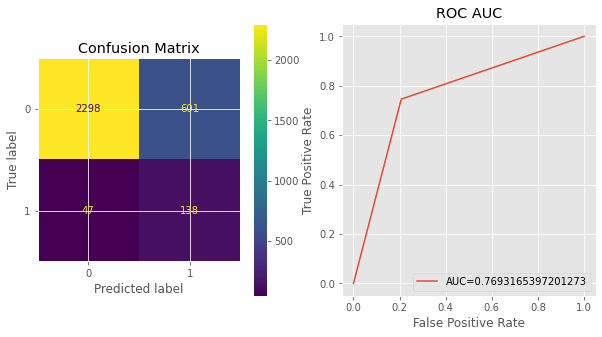

In [135]:
y_pred = grid_search_xgb.predict(X_test2)
metric_result(y_test, y_pred)

Best Threshold : 0.15
F1 Score :  0.2656
Recall Score :  0.8972972972972973
Precision Score :  0.15586854460093896


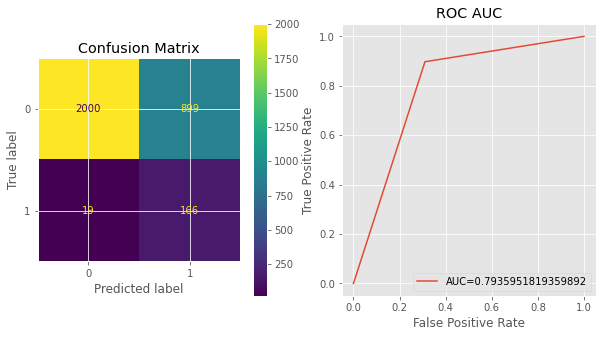

In [136]:
y_pred = grid_search_xgb.predict_proba(X_test2)[:, 1].tolist()
find_best_tresh(y_pred, y_test)

2- Decision Tree

In [137]:
weights = np.linspace(0.0,0.99,200)

params = {
          'criterion':['entropy'],#entropy
          'splitter':['best'],
          'min_samples_split':[4], #4
          'max_features':['auto'], #auto
          'class_weight': [{0: 0.20894472361809047, 1: 0.7910552763819095}]
         }
skf = RepeatedStratifiedKFold(n_splits=3)
dt = DecisionTreeClassifier()

grid_search_dt = GridSearchCV(estimator=dt, param_grid=params, scoring='f1', cv=skf)
grid_search_dt.fit(X_under2, y_under2)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 0.20894472361809047,
                                           1: 0.7910552763819095}],
                         'criterion': ['entropy'], 'max_features': ['auto'],
                         'min_samples_split': [4], 'splitter': ['best']},
             scoring='f1')

F1 Score :  0.22515212981744423
Recall Score :  0.6
Precision Score :  0.13857677902621723


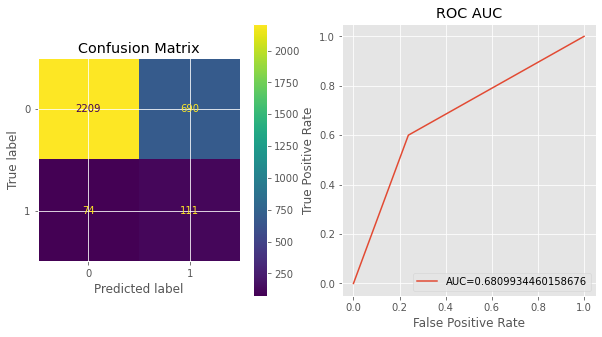

In [138]:
y_pred = grid_search_dt.predict(X_test2)
metric_result(y_test, y_pred)

In [155]:
svc = SVC(gamma='auto')
svc.set_params(**{"class_weight": {0: 0.20894472361809047, 1: 0.7910552763819095}})
svc.fit(X_under2, y_under2)
y_pred2 = svc.predict(X_test2)
print(f'f1 score: {f1_score(y_test, y_pred2)}')
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred)}')

f1 score: 0.16476426799007446
accuracy: 0.7522697795071336
recall: 0.6
precision: 0.13857677902621723
ROC-AUC: 0.6809934460158676


## Question 15:

### Import required libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [2]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Dataset information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
print(df.shape)

(344, 7)


In [5]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


#### Statistical Information

In [6]:
print("Attributes Covariance:")
df.cov()

Attributes Covariance:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [7]:
print('Attributes Correlation:')
df.corr()

Attributes Correlation:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<AxesSubplot:>

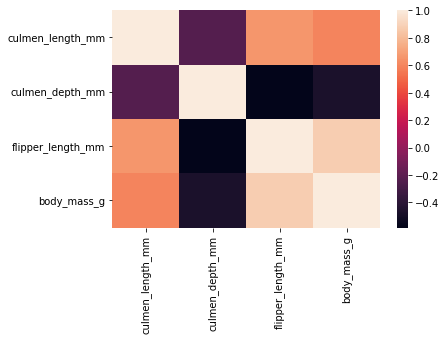

In [8]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

#### Missing Values

In [9]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [10]:
missing= missing_values_table(df)
missing

Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,10,2.9
culmen_length_mm,2,0.6
culmen_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "most_frequent")
df.iloc[:,:] = imputer.fit_transform(df)

In [12]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### Convert sex attribute to integer values

In [13]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df["sex"] = lb.fit_transform(df["sex"])
df["sex"][:5]

0    2
1    1
2    1
3    2
4    1
Name: sex, dtype: int64

#### Dataset visualization

In [14]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

<AxesSubplot:>

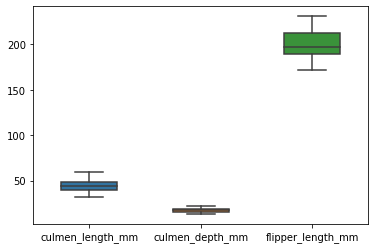

In [15]:
df1 = df[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm']]
sns.boxplot(data=df1, width=0.5,fliersize=5)

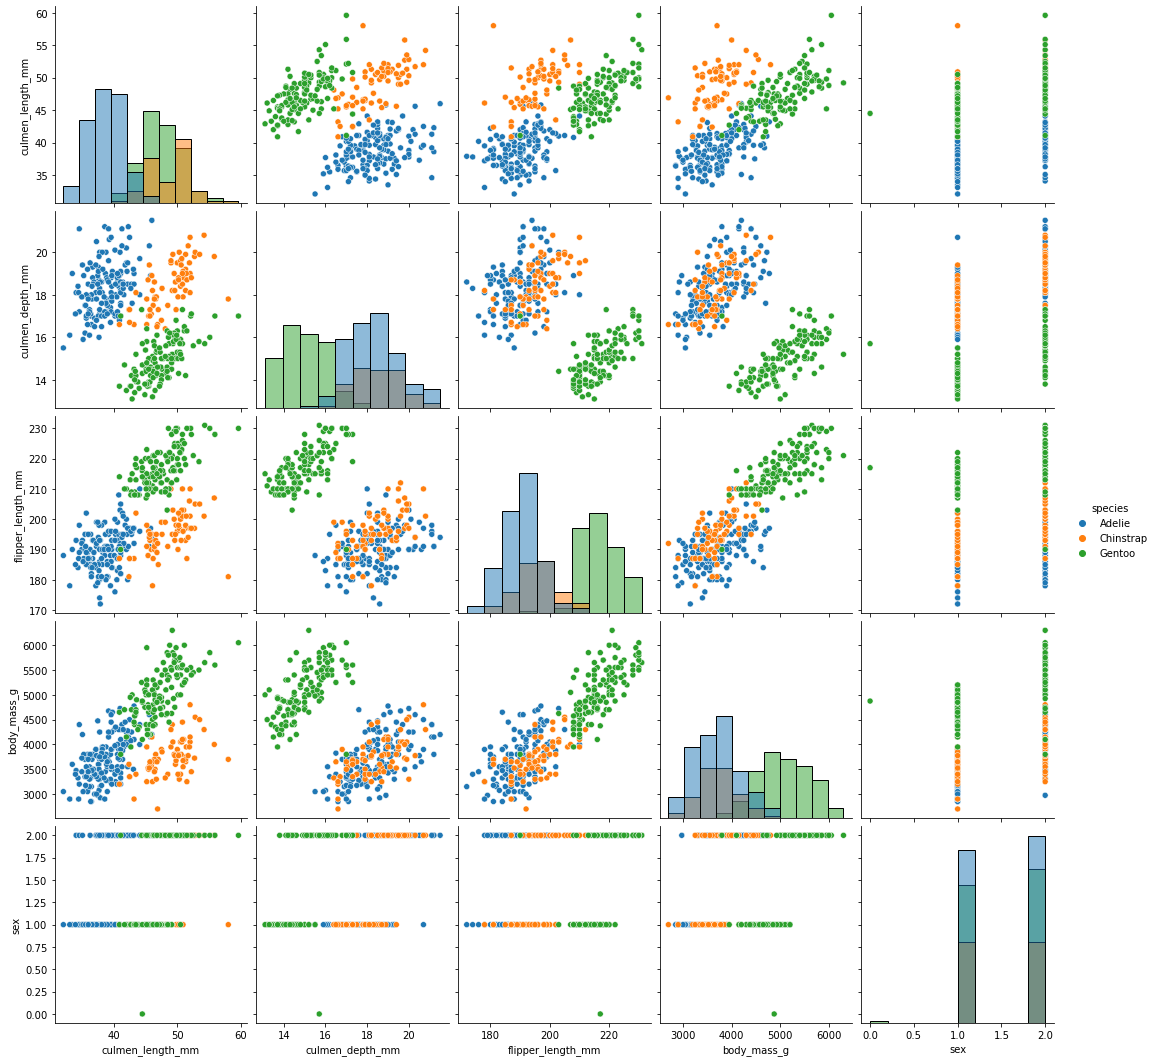

In [25]:
sns.pairplot(df, hue="species", height=3,diag_kind="hist")

/Users/mobinnesari/opt/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


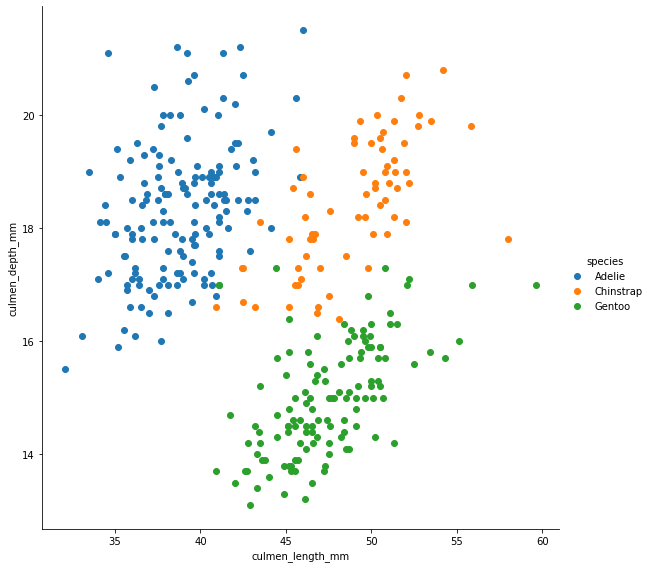

In [17]:
sns.FacetGrid(df, hue="species", size=8) \
   .map(plt.scatter, "culmen_length_mm", "culmen_depth_mm") \
   .add_legend()

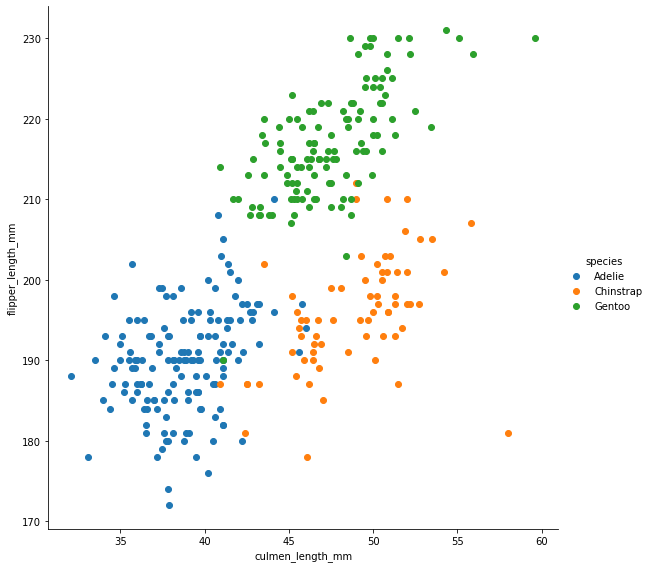

In [24]:
sns.FacetGrid(df, hue="species", height=8) \
   .map(plt.scatter, "culmen_length_mm", "flipper_length_mm") \
   .add_legend()

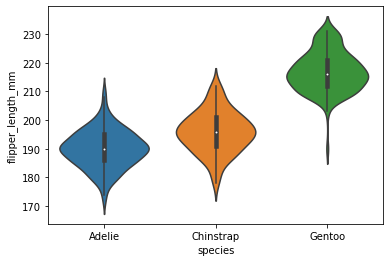

In [19]:
ax = sns.violinplot(x="species", y="flipper_length_mm", data=df,size=8)

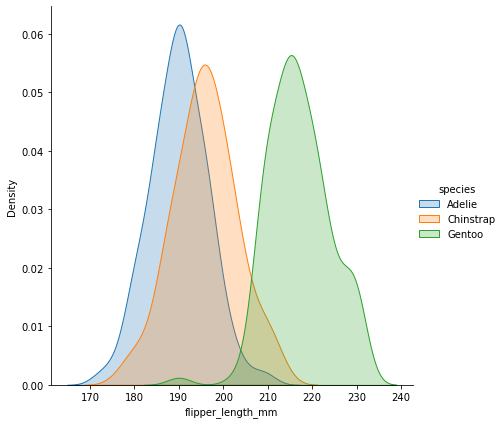

In [23]:
sns.FacetGrid(df, hue="species", height=6,) \
   .map(sns.kdeplot, "flipper_length_mm",shade=True) \
   .add_legend()

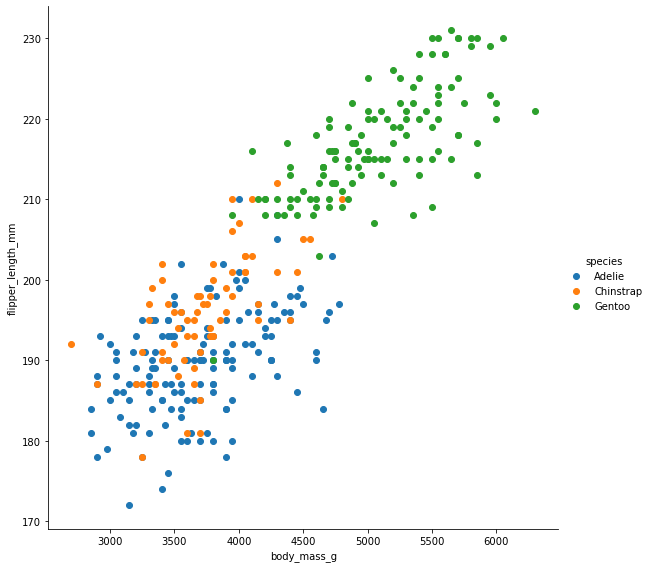

In [22]:
sns.FacetGrid(df, hue="species", height=8) \
   .map(plt.scatter, "body_mass_g", "flipper_length_mm") \
   .add_legend()


### Bagging Algorithm

In [63]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

class BaggingClassifier:
    
    def __init__(self, n_estimators=10, max_samples=1.0):
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.models = []
        
    def fit(self, X, y):
        for i in range(self.n_estimators):
            model = DecisionTreeClassifier()
            sample_indices = np.random.choice(X.shape[0], size=int(self.max_samples*X.shape[0]), replace=False)
            X_sample = X.iloc[sample_indices]
            y_sample = y.iloc[sample_indices]
            model.fit(X_sample, y_sample)
            self.models.append(model)
            
    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.models)))
        for i, model in enumerate(self.models):
            predictions[:, i] = model.predict(X)
        return np.apply_along_axis(lambda x: np.argmax(np.bincount(x.astype(int))), axis=1, arr=predictions)


Arranging data for training:

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
lb = LabelBinarizer()
df["island"] = lb.fit_transform(df["island"])
df["species"] = lb.fit_transform(df["species"])
X = df.loc[:, df.columns != "species"]
y = df["species"]
X.drop(X.index[0])
y.drop(y.index[0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =27)

In [67]:
clf = BaggingClassifier(n_estimators=50, max_samples=0.5)
clf.fit(X_train, y_train)

In [68]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9855072463768116
